In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [9]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [12]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [13]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean,Age_99,Age_minus1,Fare_999,Fare_minus1
189,36.0,7.8958,0,36.0,36.0,7.8958,7.8958,36.0,36.0,7.8958,7.8958
585,18.0,79.6500,2,18.0,18.0,79.6500,79.6500,18.0,18.0,79.6500,79.6500
144,18.0,11.5000,0,18.0,18.0,11.5000,11.5000,18.0,18.0,11.5000,11.5000
379,19.0,7.7750,0,19.0,19.0,7.7750,7.7750,19.0,19.0,7.7750,7.7750
393,23.0,113.2750,1,23.0,23.0,113.2750,113.2750,23.0,23.0,113.2750,113.2750


In [14]:
print("Original Age variance: ", X_train['Age'].var())
print("Age 99 variance: ", X_train['Age_99'].var())
print("Age minus1 variance: ", X_train['Age_minus1'].var())

print("Original Fare variance: ", X_train['Fare'].var())
print("Fare 999 variance: ", X_train['Fare_999'].var())
print("Fare minus1variance: ", X_train['Fare_minus1'].var())



Original Age variance:  204.3495133904614
Age 99 variance:  951.7275570187172
Age minus1 variance:  318.0896202624484
Original Fare variance:  2448.197913706318
Fare 999 variance:  47219.20265217623
Fare minus1variance:  2378.5676784883503


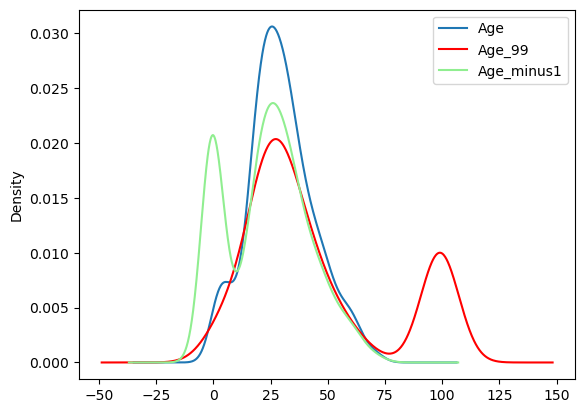

In [15]:
fig= plt.figure()
ax = fig.add_subplot(111)

#original variance distribution data
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='lightgreen')


#Add legends
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

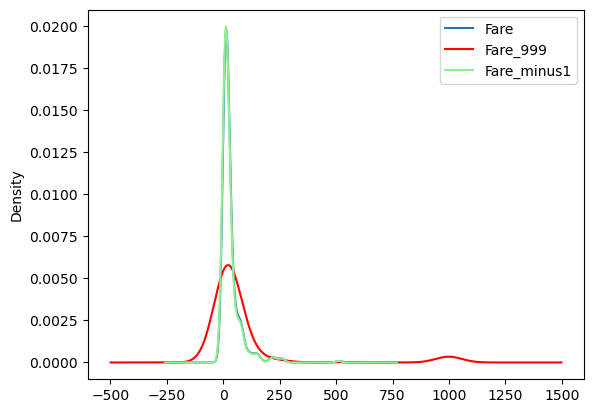

In [16]:
fig= plt.figure()
ax = fig.add_subplot(111)

#original variance distribution data
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='lightgreen')


#Add legends
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [17]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989,-7.387287,-4.149246,11.528625,16.553989
Age_median,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400,951.727557,-189.535540,-159.931663,-94.317400
Age_mean,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141,-189.535540,318.089620,257.379887,114.394141
Fare_median,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982,-159.931663,257.379887,47219.202652,762.474982
Fare_mean,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678,-94.317400,114.394141,762.474982,2378.567678
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982,-159.931663,257.379887,47219.202652,762.474982


In [18]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233,-0.144787,-0.140668,0.032079,0.205233
Age_median,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687,1.000000,-0.344476,-0.023857,-0.062687
Age_mean,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514,-0.344476,1.000000,0.066411,0.131514
Fare_median,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946,-0.023857,0.066411,1.000000,0.071946
Fare_mean,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000,-0.062687,0.131514,0.071946,1.000000
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946,-0.023857,0.066411,1.000000,0.071946


### Using Sklearn

<AxesSubplot:>

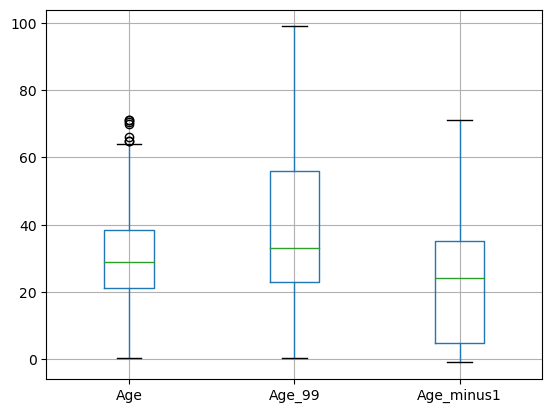

In [19]:
X_train[['Age', 'Age_99', 'Age_minus1']].boxplot()

<AxesSubplot:>

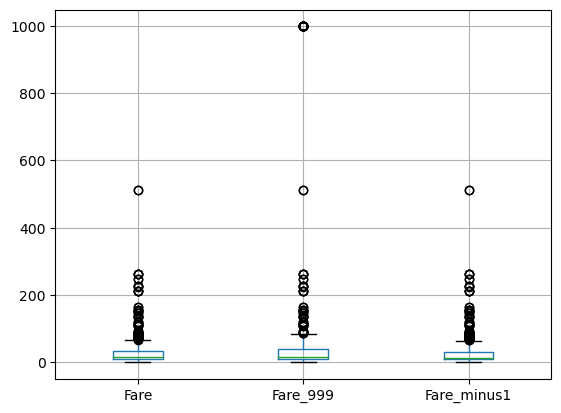

In [20]:
X_train[['Fare', 'Fare_999', 'Fare_minus1']].boxplot()

In [21]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=2)

In [22]:
imputer1= SimpleImputer(strategy= 'constant', fill_value= 99)
imputer2= SimpleImputer(strategy= 'constant', fill_value= 999)

In [23]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [24]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [25]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [26]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [27]:
X_train = trf.transform(X_train)
X_test= trf.transform(X_test)

In [28]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

In [29]:
X_test

array([[4.200000e+01, 2.628750e+01, 0.000000e+00],
       [2.100000e+01, 8.050000e+00, 0.000000e+00],
       [2.400000e+01, 6.500000e+01, 3.000000e+00],
       [2.800000e+01, 5.649580e+01, 0.000000e+00],
       [1.700000e+01, 7.925000e+00, 6.000000e+00],
       [3.000000e+01, 7.895800e+00, 0.000000e+00],
       [8.000000e+01, 3.000000e+01, 0.000000e+00],
       [2.500000e+01, 7.250000e+00, 0.000000e+00],
       [5.000000e+01, 1.336500e+02, 2.000000e+00],
       [2.500000e+01, 2.600000e+01, 1.000000e+00],
       [3.500000e+01, 2.600000e+01, 0.000000e+00],
       [3.500000e+01, 9.000000e+01, 1.000000e+00],
       [5.500000e+01, 1.600000e+01, 0.000000e+00],
       [9.900000e+01, 5.649580e+01, 0.000000e+00],
       [9.900000e+01, 5.649580e+01, 0.000000e+00],
       [1.900000e+01, 7.854200e+00, 1.000000e+00],
       [9.900000e+01, 1.524580e+01, 2.000000e+00],
       [4.900000e+01, 0.000000e+00, 0.000000e+00],
       [1.800000e+01, 9.990000e+02, 1.000000e+00],
       [6.500000e+01, 7.750000e